# Classification Project: Bank's Marketing Campaign

## by Shamim Ahmed

**Introduction**: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Domain**: Banking 

**Context**:Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

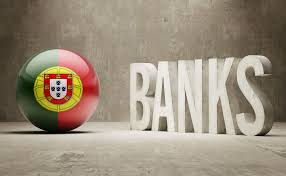

### Attribute Information : Bank client data

1.  **age** : (numeric)
2.  **job** : job type (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 
4. **education** (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 
5. **default** : has credit in default? (categorical: 'no','yes','unknown')
6. **balance**: average yearly balance, in euros (numeric)
7. **housing** : has housing loan? (categorical: 'no','yes','unknown') 
8. **loan** : has personal loan? (categorical: 'no','yes','unknown') Related with the last contact of the current campaign
9. **contact** : contact communication type (categorical: 'cellular','telephone') 
10. **day**: last contact day of the month (numeric 1 -31)
11. **month** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
12. **duration** : last contact duration, in seconds (numeric). 

**Important note**: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

13. **campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means cLient was not previously contacted) 
15. **previous** : number of contacts performed before this campaign and for this client (numeric) 
16. **poutcome** : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. **target**: has the client subscribed a term deposit? (binary: "yes","no")

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using an Ensemble Model
- Tuning an Ensemble model

### Objective:
- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Step 1. Import Libraries

In [1]:
from urllib.request import urlopen
from zipfile import ZipFile

In [2]:
import pandas as pd
import numpy as np 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

#conda install -c conda-forge imbalanced-learn
from sklearn.utils import resample

Using TensorFlow backend.


In [5]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [6]:
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Step 2. Load data

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# Download the file from the URL
zipresp = urlopen(url)

In [9]:
 # Create a new file on the hard drive
tempzip = open("./tempfile.zip", "wb")

# Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read())

# Close the newly-created file
tempzip.close()

In [10]:
# Re-open the newly-created file with ZipFile()
zf = ZipFile("./tempfile.zip")

# extract from zip file to a new folder
zf.extractall('./Desktop/bank')

# close the ZipFile instance
zf.close()

In [11]:
bank = pd.read_csv("./Desktop/bank/bank-full.csv", sep= ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
bank.shape

(45211, 17)

### Step 3. Exploratory Data Analysis

#### Descriptive Statistics for Continuous Variables

#### Take a look at the type, number of columns, entries, null values etc..

In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
bank.isnull().any()                    # one way to search for null values

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

#### There are no missing values in the dataset. 

In [15]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
continuous_vars = bank.describe().columns
continuous_vars

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

#### Visualizing Distribution of Continuous Variables

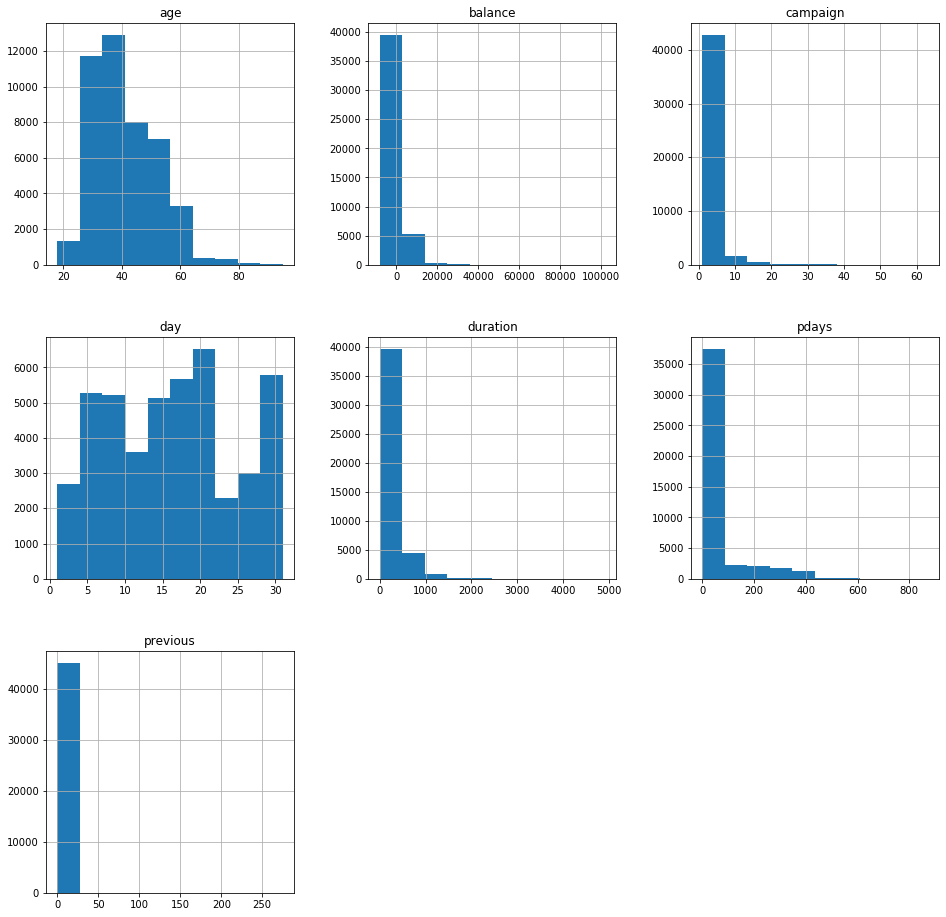

In [18]:
bank.hist(column=continuous_vars, 
                 figsize = (16,16));

### Identification and Treatment of Outliers

In [19]:
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
print (IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


#### Kindly note that 'duration' variable will be removed from the determinant variables for reasons mentioned above. So we will look into 'age' and 'balance' only for outliers.

### 'Age' : Outliers visualisation

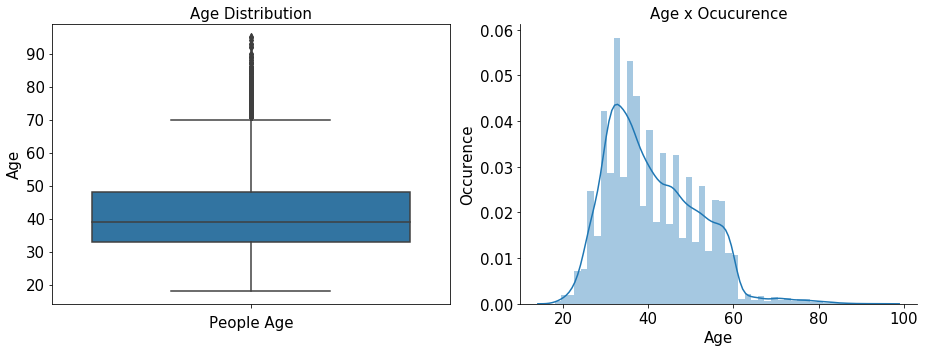

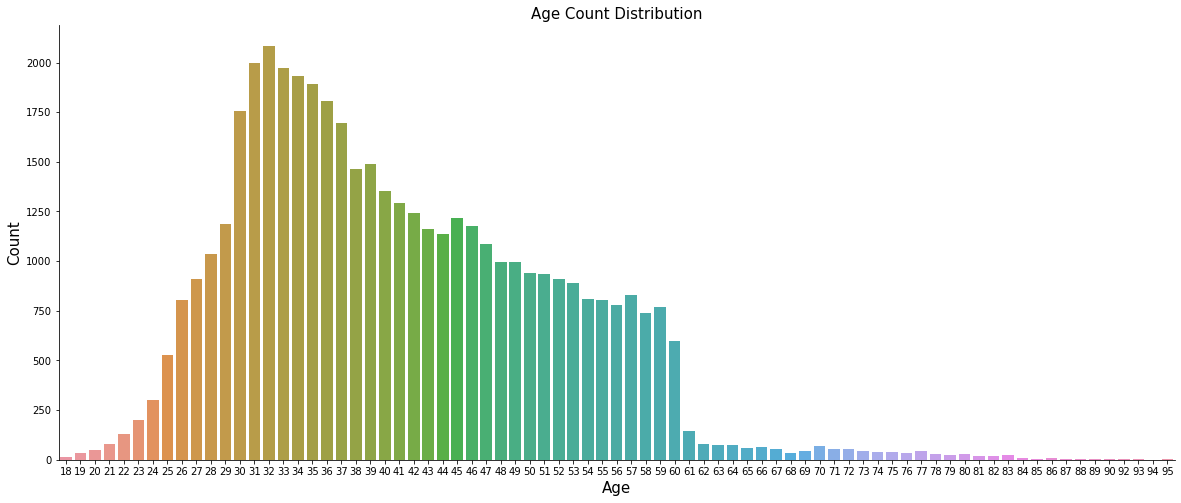

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [21]:
1.5 * (bank['age'].quantile(0.75))

72.0

In [22]:
print('Number of outliers: ', bank[bank['age'] > 72]['age'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['age'] > 72]['age'].count()*100/len(bank),2), '%')

Number of outliers:  381
Number of clients:  45211
Outliers are: 0.84 %


### 'Balance' : Outliers visualization

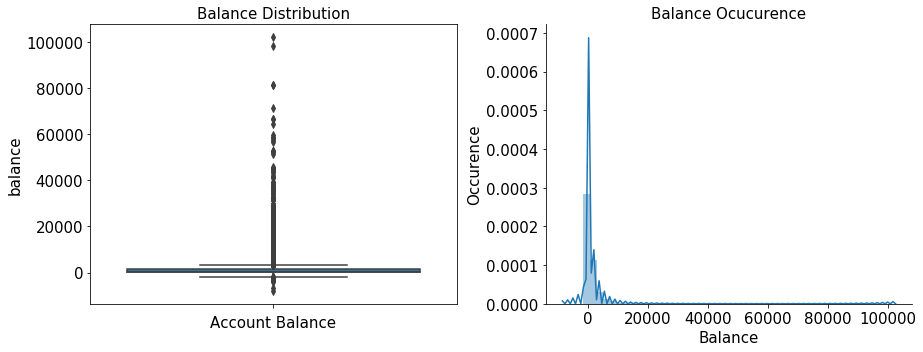

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'balance', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Account Balance', fontsize=15)
ax1.set_ylabel('balance', fontsize=15)
ax1.set_title('Balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Balance Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [24]:
1.5 * (bank['balance'].quantile(0.75))

2142.0

In [25]:
print('Numerber of outliers: ', bank[bank['balance'] > 2142]['balance'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['balance'] > 2142]['balance'].count()*100/len(bank),2), '%')

Numerber of outliers:  8009
Number of clients:  45211
Outliers are: 17.71 %


### Treatment of Outliers

### Log Transformation

Transformation of the skewed variables may also help correct the distribution of the variables. These could be logarithmic, square root, or square transformations. The most common is the logarithmic transformation.

In [26]:
print(bank['age'].skew().round(4), ": Age skewness before Log Transformation")

bank["age"] = bank["age"].map(lambda i: np.log(i) if i > 0 else 0) 
print(bank['age'].skew().round(4), ": Age skewness after Log Transformation")

0.6848 : Age skewness before Log Transformation
0.0989 : Age skewness after Log Transformation


In [27]:
print(bank['balance'].skew().round(4), ": Balance skewness before Log Transformation")

bank["balance"] = bank["balance"].map(lambda i: np.log(i) if i > 0 else 0) 
print(bank['balance'].skew().round(4), ": Balance skewness after Log Transformation")

8.3603 : Balance skewness before Log Transformation
-0.8614 : Balance skewness after Log Transformation


#### Descriptive Statistics for Categorical Variables

In [28]:
bank.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


**We have 10 categorical variables**

In [29]:
categorical_vars = bank.describe(include=["object"]).columns
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

#### Visualizing Distribution of Categorical Variables

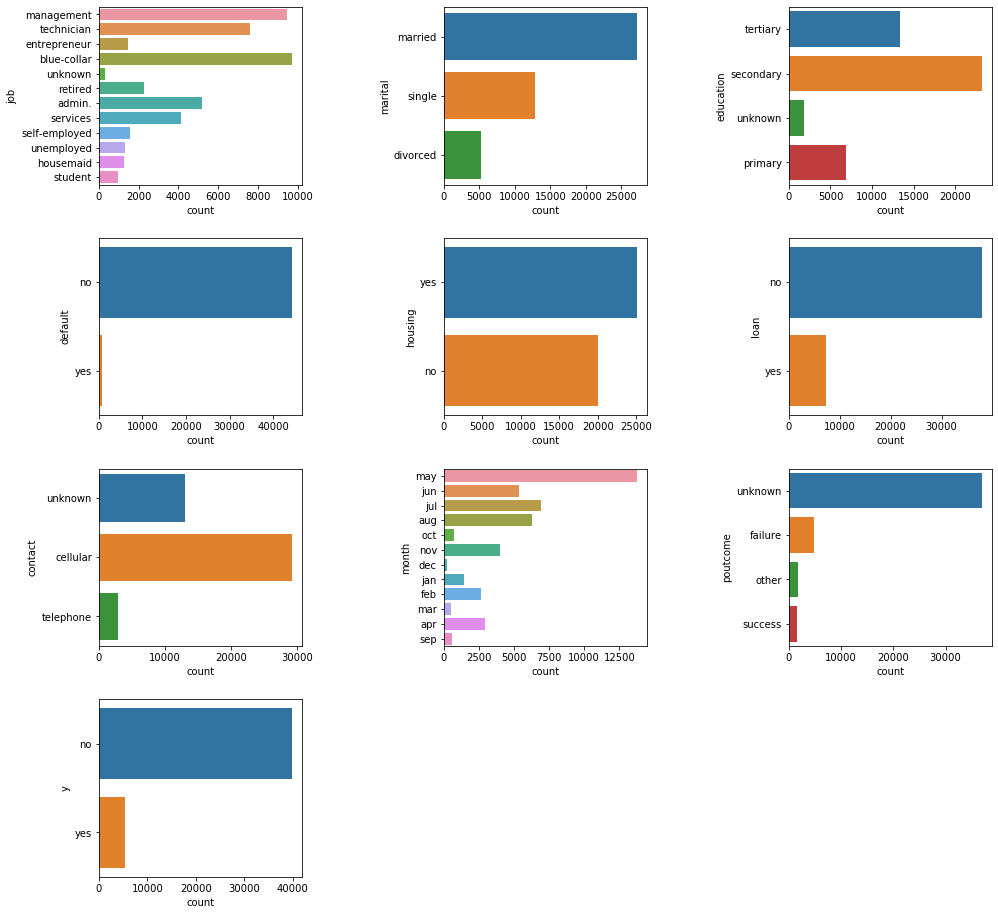

In [30]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=bank, ax=ax)

### Graphical Analysis

All categorical variables are visualized using stacked barplots (color coded using OSU colors :) for 'yes' and 'no' outcome of term deposit subscription. Below are the 10 barplots.

In [31]:
data1 = bank[bank['y'] == 'yes']
data2 = bank[bank['y'] == 'no']

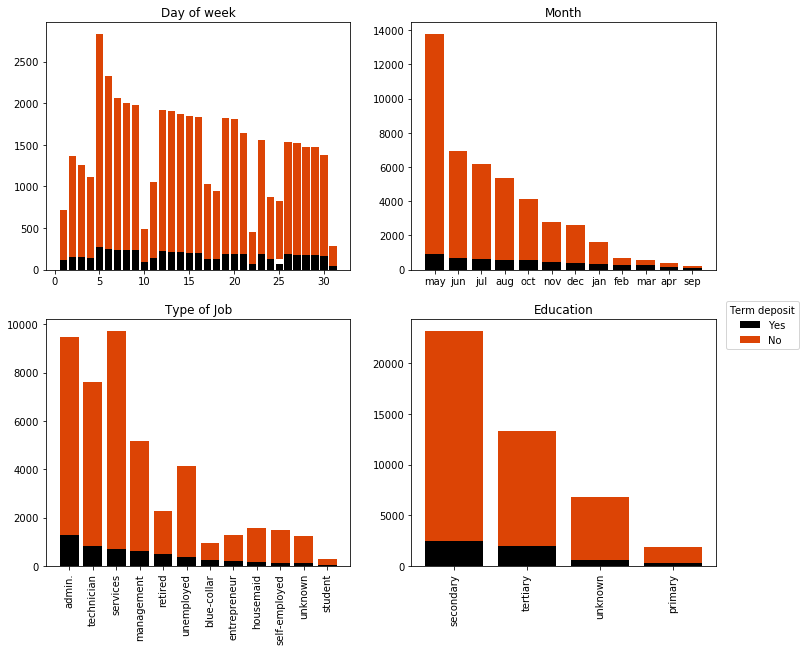

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day'].unique(),height = data1['day'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day'].unique(),height = data2['day'].value_counts(),bottom = data1['day'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')

ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')

ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)

ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

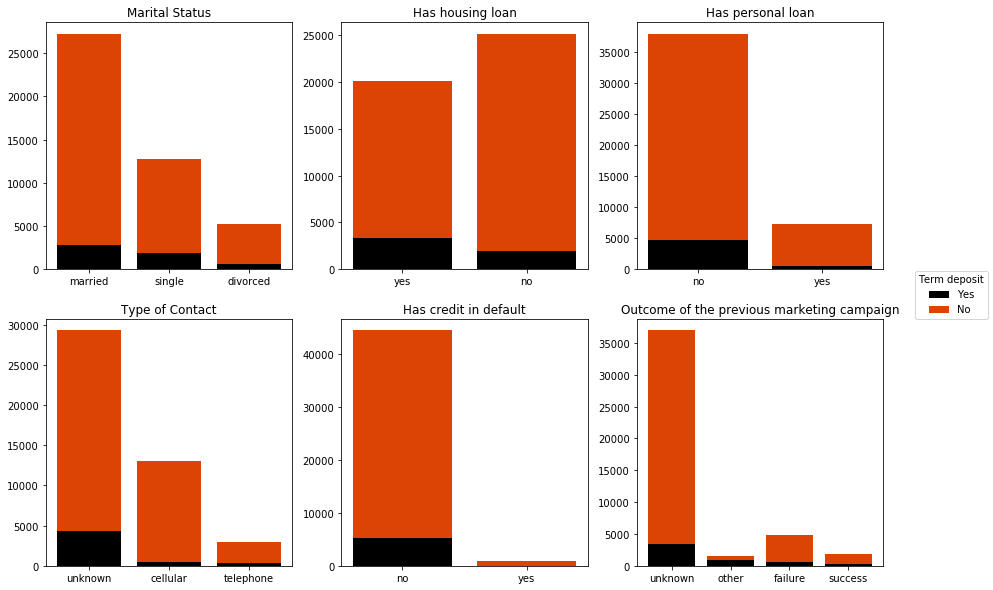

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')

ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')

ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')

ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')

ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')

ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

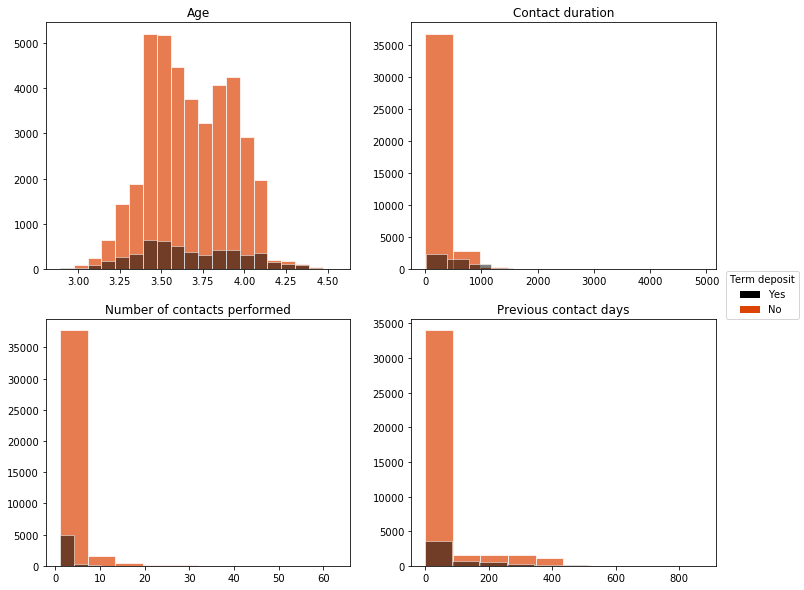

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(data1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')

ax[0, 1].hist(data2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')

ax[1, 0].hist(data2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')

ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

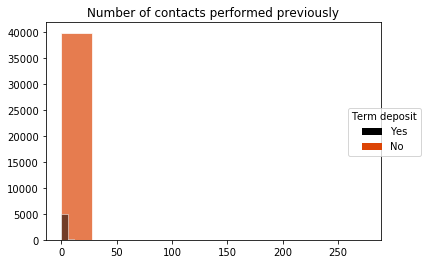

In [35]:
plt.hist(data2['previous'],color = '#DC4405',alpha=0.7, edgecolor='white') 
plt.hist(data1['previous'],color='#000000',alpha=0.5, edgecolor='white')
plt.title('Number of contacts performed previously')

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

All the histograms show similar behavior (proportion of 'no' is higher than 'yes')

### Step 4. Data Preprocessing

**duration** : last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). **Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.** 

Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [36]:
predictors = bank.iloc[:,0:16]
predictors = predictors.drop(['duration'], axis =1)              # dropping the 'duration' variable
predictors.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,4.060443,management,married,tertiary,no,7.669962,yes,no,unknown,5,may,1,-1,0,unknown
1,3.784190,technician,single,secondary,no,3.367296,yes,no,unknown,5,may,1,-1,0,unknown
2,3.496508,entrepreneur,married,secondary,no,0.693147,yes,yes,unknown,5,may,1,-1,0,unknown
3,3.850148,blue-collar,married,unknown,no,7.317212,yes,no,unknown,5,may,1,-1,0,unknown
4,3.496508,unknown,single,unknown,no,0.000000,no,no,unknown,5,may,1,-1,0,unknown


### Treatmnet of Categories Variables

- The categorical variables are converted to numberic variables, else the algorithm will not consider the categorical variables.
- Also the labels do not have any ordinal relationship, thus dummy variables are created to ensure fair weightage is given to each of the lables

In [37]:
X = pd.get_dummies(predictors, drop_first = True)
X.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,4.060443,7.669962,5,1,-1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,3.784190,3.367296,5,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3.496508,0.693147,5,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.850148,7.317212,5,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3.496508,0.000000,5,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
y = bank.iloc[: , 16]
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [39]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

### Treating Imbalanced Data

Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.

This imbalance has to treated so as to make sure that there is no bias in modeling. Imbalance is generally treated in three ways.

### Random Undersampling

In this method, the majority category, in this case 'no' category is randomly sampled to match the size of the minority 'yes' category. Remaining data of majority category is discarded.

In [41]:
random_under = RandomUnderSampler(random_state=0)
X_under_sampled, y_under_sampled = random_under.fit_resample(X, y)

pd.Series(y_under_sampled).value_counts()

1    5289
0    5289
dtype: int64

### Random Oversampling

In this method, the minority category 'no' is randomly sampled with replacement to match the size of the majority 'no' category. Minority category entries will be repeated many times.

In [42]:
random_over = RandomOverSampler(random_state=0)
X_over_sampled, y_over_sampled = random_over.fit_resample(X, y)

pd.Series(y_over_sampled).value_counts()

1    39922
0    39922
dtype: int64

### SMOTE - Synthetic Minority Oversampling Technique

This is an oversampling technique in which instead of randomly repeating minority 'yes' category, new entires are sythetically created maintaining the convexity of minority entry space. Minority category will again match the majority category samples.

In [43]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

pd.Series(y_SMOTE).value_counts()

1    39922
0    39922
dtype: int64

**SMOTE oversampling technique is selected for creation of Train and Test dataset**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.2, random_state = 777)

In [45]:
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(63875, 41)
(15969, 41)
(63875,)
(15969,)


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print (X_train.shape)
print (X_test.shape)

(63875, 41)
(15969, 41)


In [47]:
print (y_train)
print (y_test)

[1 0 0 ... 1 1 1]
[0 1 1 ... 1 0 1]


### Step 5. Training the model using Classification Algorithms

### (i) Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      8005
           1       0.86      0.83      0.84      7964

    accuracy                           0.85     15969
   macro avg       0.85      0.85      0.85     15969
weighted avg       0.85      0.85      0.85     15969



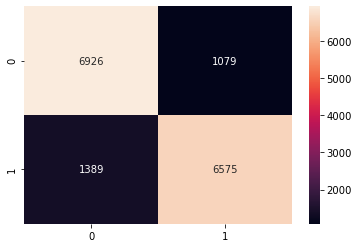

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression() 

lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_lr = (confusion_matrix(y_test, lr_pred))
sns.heatmap(cm_lr, annot=True, fmt="d")

print(classification_report(y_test, lr_pred))

### Logistic Regression classifier k-fold score

In [49]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_lr = (cross_val_score(lr_model, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy'))

print (accuracies_lr.mean().round(2)*100, "percent mean accuracy")
print (accuracies_lr.std().round(2)*100, "percent variance in accuracy")

85.0 percent mean accuracy
0.0 percent variance in accuracy


### (ii) KNN Classification

k=1 84.01 (+/- 0.43)
k=2 88.04 (+/- 0.41)
k=3 87.49 (+/- 0.43)
k=4 88.36 (+/- 0.45)
k=5 88.16 (+/- 0.47)
k=6 88.49 (+/- 0.53)
k=7 88.40 (+/- 0.58)
k=8 88.55 (+/- 0.51)
k=9 88.52 (+/- 0.55)
k=10 88.56 (+/- 0.55)
k=11 88.54 (+/- 0.58)
k=12 88.62 (+/- 0.58)
k=13 88.57 (+/- 0.58)
k=14 88.61 (+/- 0.55)
k=15 88.62 (+/- 0.56)
k=16 88.64 (+/- 0.56)
k=17 88.66 (+/- 0.57)
k=18 88.69 (+/- 0.60)
k=19 88.68 (+/- 0.60)
k=20 88.67 (+/- 0.64)
k=21 88.63 (+/- 0.63)
k=22 88.65 (+/- 0.60)
k=23 88.62 (+/- 0.62)
k=24 88.65 (+/- 0.57)
k=25 88.65 (+/- 0.55)
The optimal number of neighbors is 17 with 88.7%


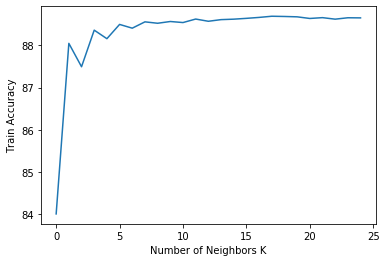

In [50]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size = 0.2, random_state = 777)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

**As derived from the plot above, the number of neighbours is taken as 8; beyond this level, there is marginal improvement in model performance**

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      8005
           1       0.88      0.87      0.87      7964

    accuracy                           0.87     15969
   macro avg       0.87      0.87      0.87     15969
weighted avg       0.87      0.87      0.87     15969



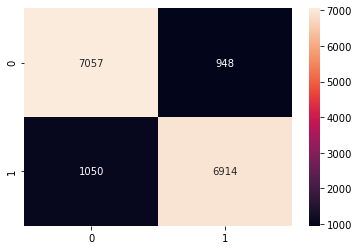

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_knn = (confusion_matrix(y_test, knnpred))
sns.heatmap(cm_knn, annot=True, fmt="d")

print(classification_report(y_test, knnpred))

### K-Nearest Neighbor Classifier k-fold score

In [52]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_knn = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy'))

print (accuracies_knn.mean().round(2)*100, "percent mean accuracy")
print (accuracies_knn.std().round(2)*100, "percent variance in accuracy")

87.0 percent mean accuracy
0.0 percent variance in accuracy


### (iii) Support Vector Classification

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      8005
           1       0.77      0.76      0.76      7964

    accuracy                           0.77     15969
   macro avg       0.77      0.77      0.77     15969
weighted avg       0.77      0.77      0.77     15969



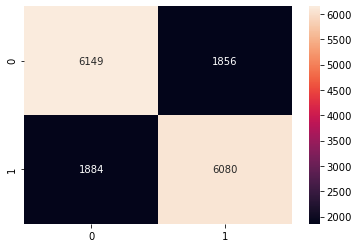

In [53]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')

svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_svc = (confusion_matrix(y_test, svcpred))
sns.heatmap(cm_svc, annot=True, fmt="d")

print(classification_report(y_test, svcpred))

### SVC Classifier k-fold score

In [54]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_svc = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy'))

print (accuracies_svc.mean().round(2)*100, "percent mean accuracy")
print (accuracies_svc.std().round(2)*100, "percent variance in accuracy")

77.0 percent mean accuracy
0.0 percent variance in accuracy


### (iv) Decision Tree Classification

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8005
           1       0.85      0.87      0.86      7964

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969



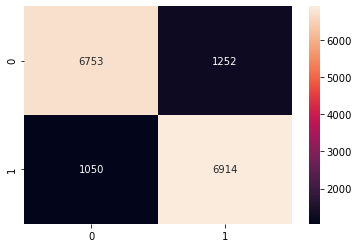

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')                    #criterion = entropy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_dtree = (confusion_matrix(y_test, dtreepred))
sns.heatmap(cm_dtree, annot=True, fmt="d")

print(classification_report(y_test, dtreepred))

### DecisionTree Classifier k-fold score

In [56]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_dtree = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy'))

print (accuracies_dtree.mean().round(2)*100, "percent mean accuracy")
print (accuracies_dtree.std().round(2)*100, "percent variance in accuracy")

85.0 percent mean accuracy
0.0 percent variance in accuracy


### (v) Naive Bayes (gaussian) Classification

              precision    recall  f1-score   support

           0       0.79      0.67      0.72      8005
           1       0.71      0.82      0.76      7964

    accuracy                           0.75     15969
   macro avg       0.75      0.75      0.74     15969
weighted avg       0.75      0.75      0.74     15969



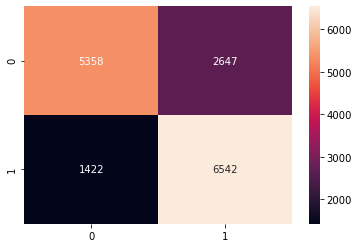

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_gnb = (confusion_matrix(y_test, gnb_pred))
sns.heatmap(cm_gnb, annot=True, fmt="d")

print(classification_report(y_test, gnb_pred))

### Naive Bayes classifier k-fold score

In [58]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_gnb = (cross_val_score(gnb, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy'))

print (accuracies_gnb.mean().round(2)*100, "percent mean accuracy")
print (accuracies_gnb.std().round(2)*100, "percent variance in accuracy")

75.0 percent mean accuracy
1.0 percent variance in accuracy


### Step 6. Ensemble models vis-a-vis the Base models

### (vi) Random Forest Classificaiton

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8005
           1       0.92      0.92      0.92      7964

    accuracy                           0.92     15969
   macro avg       0.92      0.92      0.92     15969
weighted avg       0.92      0.92      0.92     15969



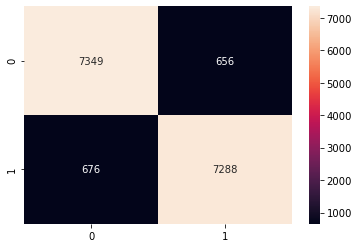

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)                   #criterion = entropy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_rfc = (confusion_matrix(y_test, rfcpred))
sns.heatmap(cm_rfc, annot=True, fmt="d")

print(classification_report(y_test, rfcpred))

### RandomForest Classifier k-fold score

In [60]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_rfc = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy'))

print (accuracies_rfc.mean().round(2)*100, "percent mean accuracy")
print (accuracies_rfc.std().round(2)*100, "percent variance in accuracy")

91.0 percent mean accuracy
0.0 percent variance in accuracy


### (vii) XGBoost Classification

In [61]:
#conda install -c anaconda py-xgboost

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      8005
           1       0.86      0.83      0.84      7964

    accuracy                           0.85     15969
   macro avg       0.85      0.85      0.85     15969
weighted avg       0.85      0.85      0.85     15969



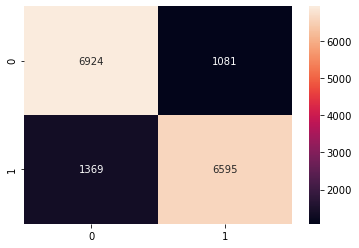

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_xgb = (confusion_matrix(y_test, xgb_pred))
sns.heatmap(cm_xgb, annot=True, fmt="d")

print(classification_report(y_test, xgb_pred))

### XGBoost Classifier k-fold score

In [63]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_xgb = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10))

print (accuracies_xgb.mean().round(2)*100, "percent mean accuracy")
print (accuracies_xgb.std().round(2)*100, "percent variance in accuracy")

85.0 percent mean accuracy
0.0 percent variance in accuracy


### (viii) Gradient Boost Classification

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      8005
           1       0.86      0.82      0.84      7964

    accuracy                           0.85     15969
   macro avg       0.85      0.85      0.85     15969
weighted avg       0.85      0.85      0.85     15969



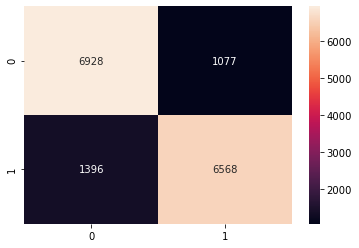

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gbpred = gb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm_gb = (confusion_matrix(y_test, gbpred))
sns.heatmap(cm_gb, annot=True, fmt="d")

print(classification_report(y_test, gbpred))

### Gradient Boost Classifier k-fold score

In [65]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies_gb = (cross_val_score(gb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy'))

print (accuracies_gb.mean().round(2)*100, "percent mean accuracy")
print (accuracies_gb.std().round(2)*100, "percent variance in accuracy")

84.0 percent mean accuracy
0.0 percent variance in accuracy


### Comparing Performances of all the mdoels

In [66]:
models = pd.DataFrame({
                'Models': ['Logistic Regression', 'K-Near Neighbors', 'Support Vector Machine', 'Decision Tree Classifier', 
                             'Gausian NB', 'Random Forest Classifier', 'XGBoost', 'Gradient Boosting'],
                'Score':  [accuracies_lr.mean(), accuracies_knn.mean(), accuracies_svc.mean(), accuracies_dtree.mean(), 
                           accuracies_gnb.mean(), accuracies_rfc.mean(), accuracies_xgb.mean(), accuracies_gb.mean()]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,Random Forest Classifier,0.913973
1,K-Near Neighbors,0.868227
3,Decision Tree Classifier,0.852900
0,Logistic Regression,0.849018
6,XGBoost,0.845213
7,Gradient Boosting,0.844744
2,Support Vector Machine,0.766294
4,Gausian NB,0.750466


### Comparison amongst Ensemble models : Random Forest, XGBOOST & Gradient Boost 

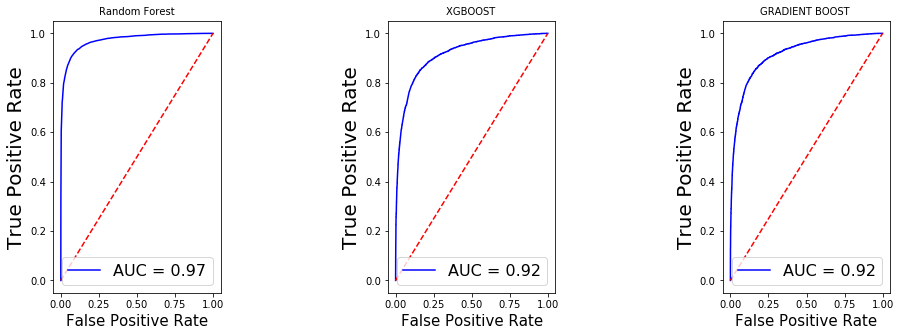

In [67]:
from sklearn import metrics
fig, (ax, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

#Random Forest
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Random Forest',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#XGBoost 
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax1.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('XGBOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

#Gradient Boost
probs = gb.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax2.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('GRADIENT BOOST ',fontsize=10)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

### Comparison amongst Base Models

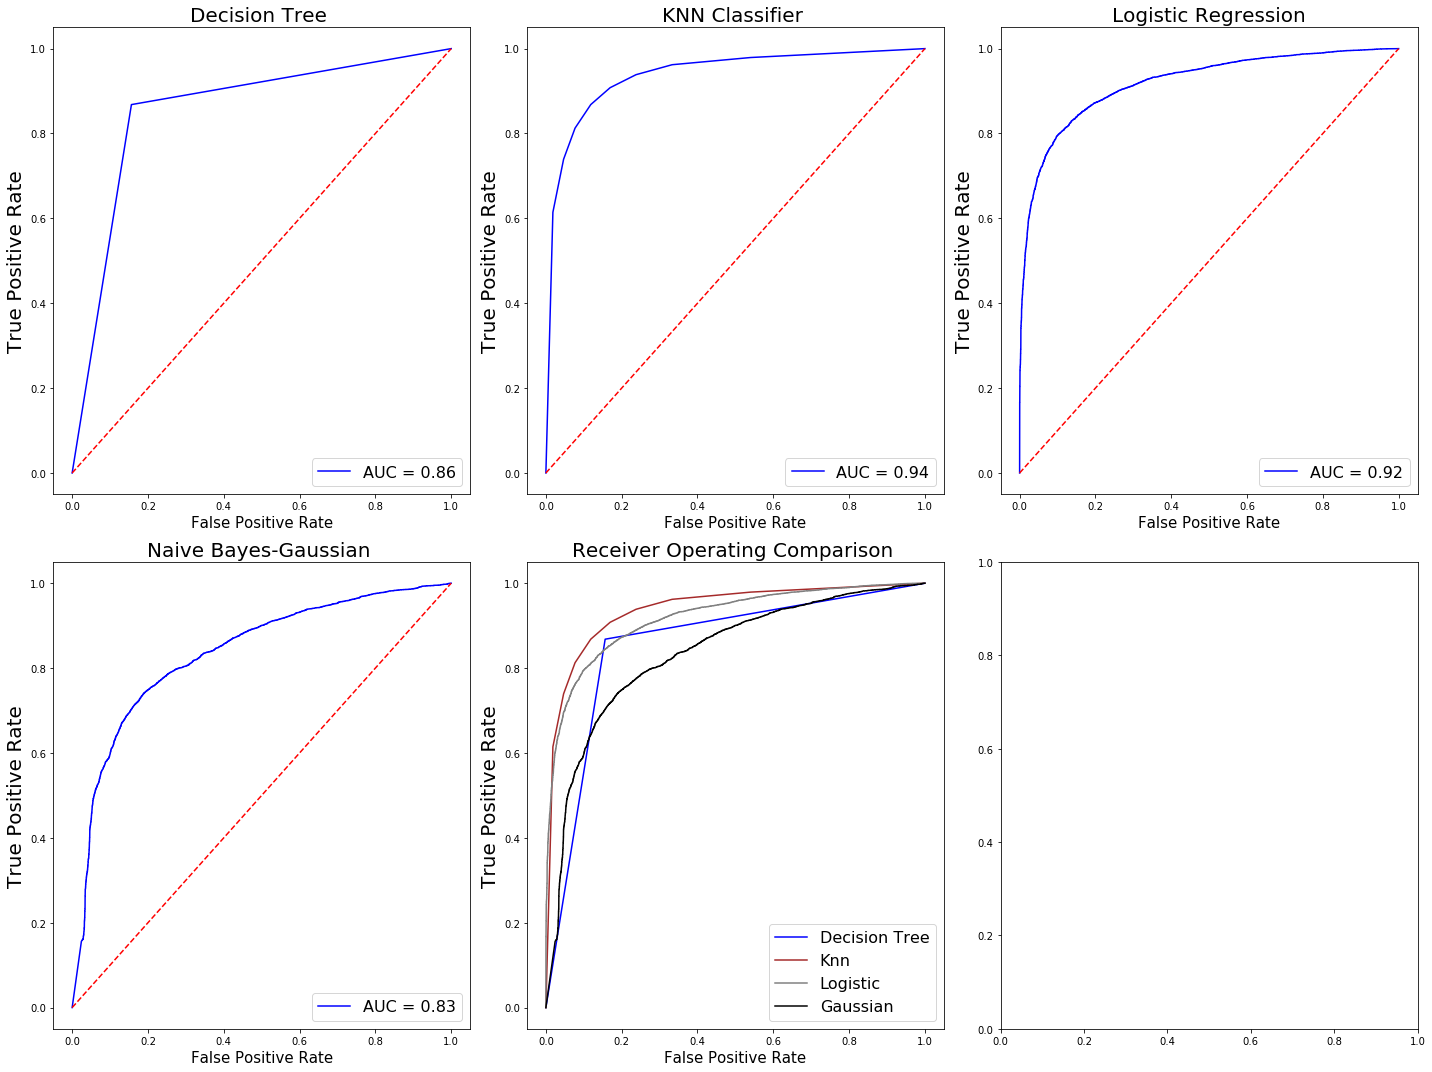

In [68]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#Decision Tree
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Decision Tree ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#KNN
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('KNN Classifier ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#Logistic Regression
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,2].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Logistic Regression',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#Naive Bayes (Gaussian)
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,0].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Naive Bayes-Gaussian ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS 
ax_arr[1,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,1].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,1].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

### Conclusion

The ensemble models performs far better than the base models for the dataset. **Random Forest classifier** tops the chart amongst ensemble models.

**KNN classifier** tops the chart amongst base models.